데이터
--
- 포도주 품질 분류 https://goo.gl/Gyc8K7

출처
--
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook

모듈 불러오기
--

In [1]:
#한글 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


- fixed acidity - 결합 산도 
- volatile acidity - 휘발성 산도 
- citric acid - 시트르산 
- residual sugar - 잔류 설탕 
- chlorides	 - 염화물 
- free sulfur dioxide - 자유 이산화황 
- total sulfur dioxide - 총 이산화황 
- density - 밀도 
- pH - pH 
- sulphates - 황산염 
- alcohol - 알코올 
- quality - 품질 (0 ~ 10 점)

In [3]:
wine = pd.read_csv('winequality-red.csv')
# 데이터 사본 https://goo.gl/m3eCrf
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
column_list = ["결합산도","휘발성산도","시트르산",
               "잔류설탕","염화물","자유이산화황",
               "총이산화황","밀도","PH","황산염",
               "알코올","품질"]

In [5]:
wine.columns = column_list

In [6]:
wine.head()

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
결합산도      1599 non-null float64
휘발성산도     1599 non-null float64
시트르산      1599 non-null float64
잔류설탕      1599 non-null float64
염화물       1599 non-null float64
자유이산화황    1599 non-null float64
총이산화황     1599 non-null float64
밀도        1599 non-null float64
PH        1599 non-null float64
황산염       1599 non-null float64
알코올       1599 non-null float64
품질        1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

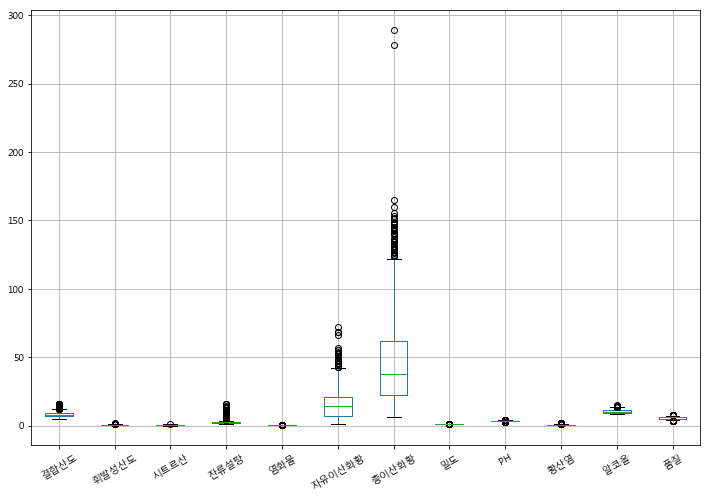

In [8]:
wine.boxplot(figsize=(12,8))
plt.xticks(rotation=30)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

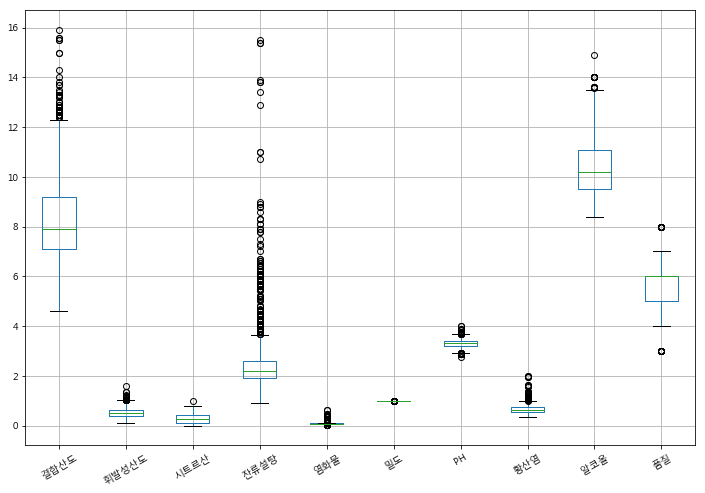

In [9]:
wine.drop(["자유이산화황","총이산화황"],axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=30)

In [10]:
wine[["알코올","품질"]].head()

,알코올,품질
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5


C:\Users\pc-23\Anaconda312\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


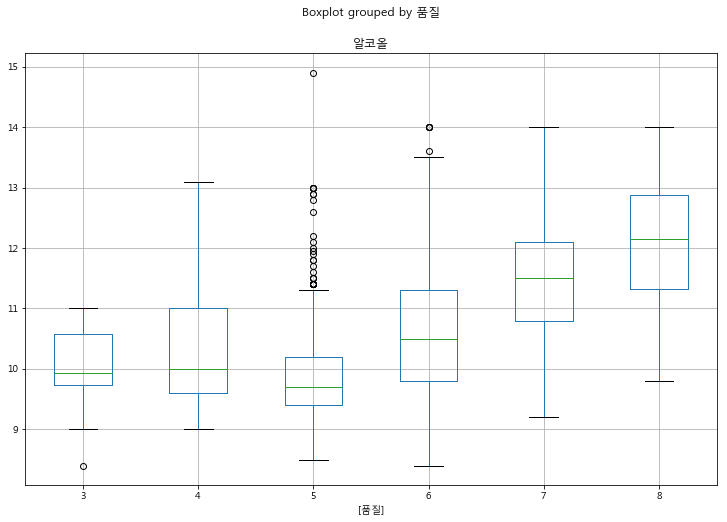

In [11]:
wine[["알코올","품질"]].boxplot(by="품질",figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D153898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D62F9E8>]], dtype=object)

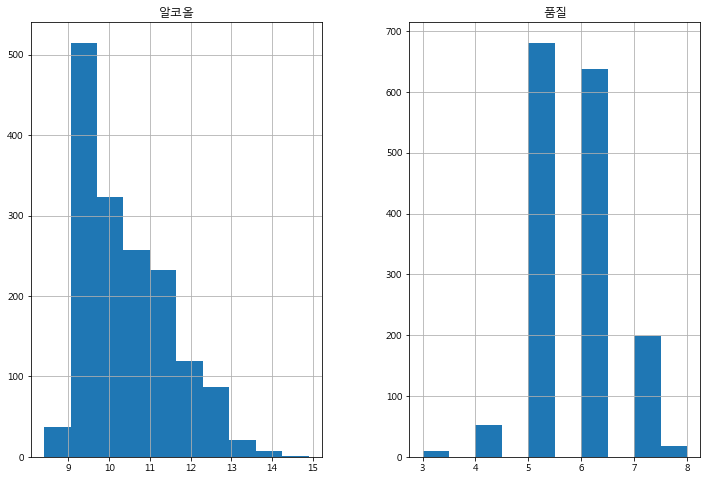

In [12]:
wine[["알코올","품질"]].hist(figsize=(12,8)) #y축 수량

C:\Users\pc-23\Anaconda312\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


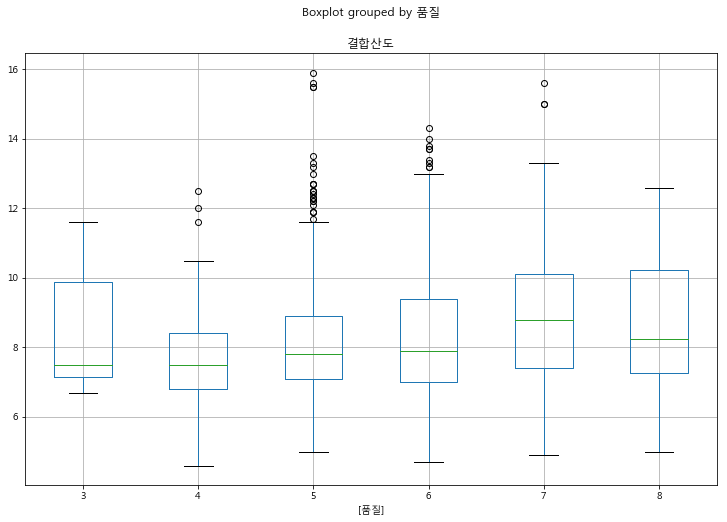

In [13]:
wine[["결합산도","품질"]].boxplot(by="품질",figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D92B7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA27860>]], dtype=object)

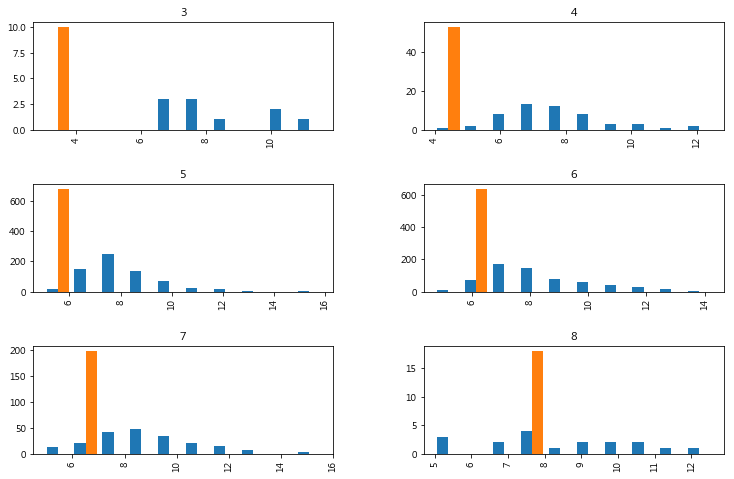

In [14]:
wine[["결합산도","품질"]].hist(by="품질",figsize=(12,8)) #y축 수량

C:\Users\pc-23\Anaconda312\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


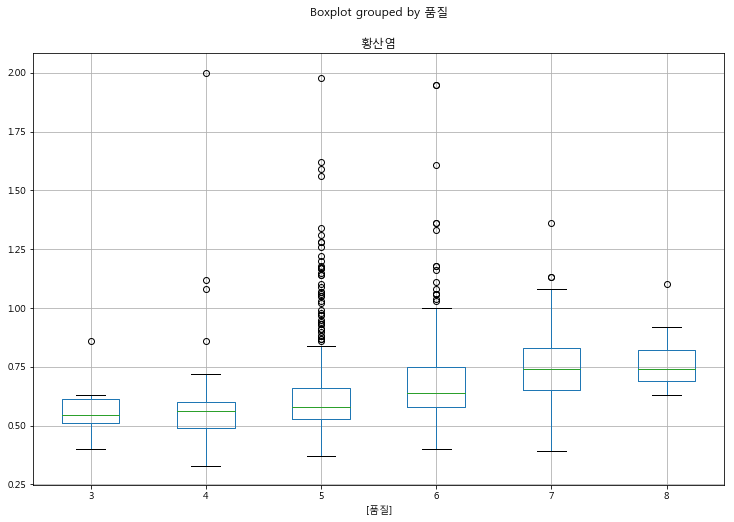

In [15]:
wine[["황산염","품질"]].boxplot(by="품질",figsize=(12,8))

In [16]:
X=wine.drop(["품질"],axis=1)
y=wine["품질"]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.3,stratify=y)

In [18]:
np.bincount(y_test)

array([  0,   0,   0,   3,  16, 204, 192,  60,   5], dtype=int64)

In [19]:
model=KNeighborsClassifier()

In [20]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
print("훈련= ",model.score(X_train,y_train))
print("테스트= ",model.score(X_test,y_test))

훈련=  0.654155495979
테스트=  0.445833333333


In [22]:
sc= MinMaxScaler()
X=sc.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.3,stratify=y)

In [24]:
model=KNeighborsClassifier()

In [25]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
print("훈련= ",model.score(X_train,y_train))
print("테스트= ",model.score(X_test,y_test))

훈련=  0.703306523682
테스트=  0.564583333333


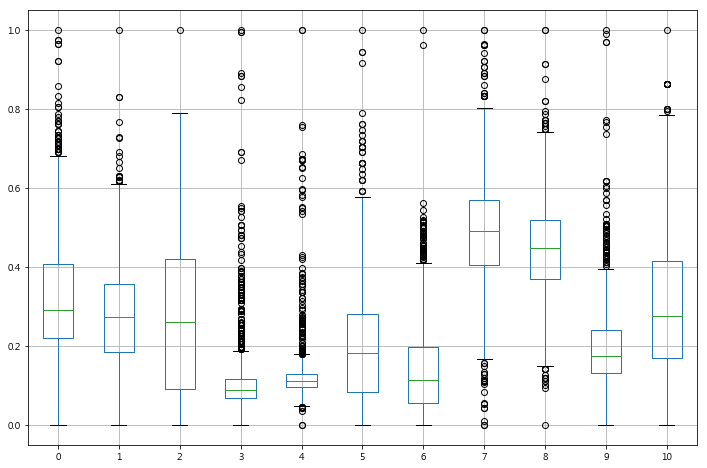

In [27]:
df=pd.DataFrame(X)
df.boxplot(figsize=(12,8))

In [28]:
bins = (2.9,6.5,8.1)
la = [0,1]
wine["품질2"] = pd.cut(wine["품질"],bins = bins, labels = la)

In [29]:
wine.head()

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올,품질,품질2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [30]:
X=wine.drop(["품질","품질2"],axis=1)
y=wine["품질2"]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.3,stratify=y)
model=KNeighborsClassifier()
model.fit(X_train,y_train)
print("훈련= ",model.score(X_train,y_train))
print("테스트= ",model.score(X_test,y_test))

훈련=  0.908847184987
테스트=  0.860416666667


In [32]:
sc= MinMaxScaler()
X=sc.fit_transform(X)


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.3,stratify=y)
model=KNeighborsClassifier()
model.fit(X_train,y_train)
print("훈련= ",model.score(X_train,y_train))
print("테스트= ",model.score(X_test,y_test))

훈련=  0.917783735478
테스트=  0.85625


In [34]:
X=wine.drop(["품질","품질2"],axis=1)
y=wine["품질2"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.3,stratify=y)


In [35]:
tree =tree.DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련= ",tree.score(X_train,y_train))
print("훈련= ",tree.score(X_test,y_test))

훈련=  1.0
훈련=  0.88125
